## Synthetic Employee Attrition Analysis and Prediction 

## 1. Importing Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import accuracy_score

### 2. Load and Read Data

### 2.1 Train Data

In [2]:
#Load the dataset
train_data_df = pd.read_csv('train.csv')

#printing the columns of the dataset
print('\nColumns in the dataset\n')
display(train_data_df.columns)

#first 5 rows 
print('\nFirst five rows of the dataset')
display(train_data_df.head())

#last 5 rows
print('\nLast five rows of the dataset')
display(train_data_df.tail())

#shape 
print('\nShape of the dataset\n')
display(train_data_df.shape)

#dataset information
print('\nInformation of the dataset\n')
display(train_data_df.info())


Columns in the dataset



Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')


First five rows of the dataset


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed



Last five rows of the dataset


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9,No,No,No,Good,Low,Left
59597,15796,56,Male,19,Technology,6660,Good,High,Average,0,...,3,Mid,Medium,81,No,No,No,Good,Low,Stayed



Shape of the dataset



(59598, 24)


Information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  objec

None

### 2.2 Test Data

In [3]:
#Load the dataset
test_data_df = pd.read_csv('test.csv')

#printing the columns of the dataset
print('\nColumns in the dataset\n')
display(test_data_df.columns)

#first 5 rows 
print('\nFirst five rows of the dataset')
display(test_data_df.head())

#last 5 rows
print('\nLast five rows of the dataset')
display(test_data_df.tail())

#shape 
print('\nShape of the dataset\n')
display(test_data_df.shape)

#dataset information
print('\nInformation of the dataset\n')
display(test_data_df.info())


Columns in the dataset



Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')


First five rows of the dataset


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed



Last five rows of the dataset


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed
14899,73042,59,Female,48,Education,3774,Good,High,Below Average,1,...,4,Mid,Large,118,No,No,No,Good,Very High,Left



Shape of the dataset



(14900, 24)


Information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  objec

None

### 3. Exploratory Data Analysis

### 3.1 Train Data
### Descriptive Statistics for Numerical Features

In [4]:
#descriptive statistics of quantitative features
print('\n Descriptive Statistics\n')
display(train_data_df.describe())


 Descriptive Statistics



,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


### Descriptive Statistics for both Categorical and Numerical Columns 

In [5]:
#Descriptive statistics for both categorical and numerical features
#Numerical - count, mean, std, min, 25%, 50%, 75%, max
#Categorical - Unique, top, freq, count
print('Descriptive Statistics for Categorical and Numerical Columns')
display(train_data_df.describe(include = 'all'))

Descriptive Statistics for Categorical and Numerical Columns


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,59598.000000,59598.000000,59598,59598.000000,59598,59598.000000,59598,59598,59598,59598.000000,...,59598.000000,59598,59598,59598.000000,59598,59598,59598,59598,59598,59598
unique,NaN,NaN,2,NaN,5,NaN,4,4,4,NaN,...,NaN,3,3,NaN,2,2,2,4,4,2
top,NaN,NaN,Male,NaN,Technology,NaN,Good,High,Average,NaN,...,NaN,Entry,Medium,NaN,No,No,No,Good,Low,Stayed
freq,NaN,NaN,32739,NaN,15507,NaN,22528,29779,35810,NaN,...,NaN,23867,29745,NaN,48239,56680,49895,29766,23758,31260
mean,37227.118729,38.565875,NaN,15.753901,NaN,7302.397983,NaN,NaN,NaN,0.832578,...,1.648075,NaN,NaN,55.758415,NaN,NaN,NaN,NaN,NaN,NaN
std,21519.150028,12.079673,NaN,11.245981,NaN,2151.457423,NaN,NaN,NaN,0.994991,...,1.555689,NaN,NaN,25.411090,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,18.000000,NaN,1.000000,NaN,1316.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,18580.250000,28.000000,NaN,7.000000,NaN,5658.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,37209.500000,39.000000,NaN,13.000000,NaN,7354.000000,NaN,NaN,NaN,1.000000,...,1.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,55876.750000,49.000000,NaN,23.000000,NaN,8880.000000,NaN,NaN,NaN,2.000000,...,3.000000,NaN,NaN,76.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Value Counts

In [6]:
#Number of unique values in each column, escpecially categorical data
print('Unique values in each column')
train_data_df.nunique()

Unique values in each column


Employee ID                 59598
Age                            42
Gender                          2
Years at Company               51
Job Role                        5
Monthly Income               9569
Work-Life Balance               4
Job Satisfaction                4
Performance Rating              4
Number of Promotions            5
Overtime                        2
Distance from Home             99
Education Level                 5
Marital Status                  3
Number of Dependents            7
Job Level                       3
Company Size                    3
Company Tenure                127
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Company Reputation              4
Employee Recognition            4
Attrition                       2
dtype: int64

In [7]:
#Unique values and their count in the categorical columns
def unique_values(data):
    for col in data.columns:
        if(data[col].dtype == object):
            print(f"{col} - ", dict(data[col].value_counts()))
unique_values(train_data_df)

Gender -  {'Male': 32739, 'Female': 26859}
Job Role -  {'Technology': 15507, 'Healthcare': 13642, 'Education': 12490, 'Media': 9574, 'Finance': 8385}
Work-Life Balance -  {'Good': 22528, 'Fair': 18046, 'Excellent': 10719, 'Poor': 8305}
Job Satisfaction -  {'High': 29779, 'Very High': 12111, 'Medium': 11817, 'Low': 5891}
Performance Rating -  {'Average': 35810, 'High': 11888, 'Below Average': 8950, 'Low': 2950}
Overtime -  {'No': 40148, 'Yes': 19450}
Education Level -  {'Bachelor’s Degree': 17826, 'Associate Degree': 14915, 'Master’s Degree': 12020, 'High School': 11748, 'PhD': 3089}
Marital Status -  {'Married': 29908, 'Single': 20835, 'Divorced': 8855}
Job Level -  {'Entry': 23867, 'Mid': 23753, 'Senior': 11978}
Company Size -  {'Medium': 29745, 'Small': 17935, 'Large': 11918}
Remote Work -  {'No': 48239, 'Yes': 11359}
Leadership Opportunities -  {'No': 56680, 'Yes': 2918}
Innovation Opportunities -  {'No': 49895, 'Yes': 9703}
Company Reputation -  {'Good': 29766, 'Poor': 12034, 'Fair

### Missing Values Count

In [8]:
#Checking for the null/missing values
train_data_df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

The train data does not have any missing value

### 3.2 Test Data
### Descriptive Statistics for Numerical Features

In [9]:
#descriptive statistics of quantitative features
print('\n Descriptive Statistics\n')
display(test_data_df.describe())


 Descriptive Statistics



,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,37339.022081,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329,55.603624
std,21453.129293,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401,25.352807
min,5.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18825.500000,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000,36.000000
50%,37433.000000,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000,56.000000
75%,55857.500000,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000,75.000000
max,74471.000000,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000,127.000000


### Descriptive Statistics for both Categorical and Numerical Columns

In [10]:
#Descriptive statistics for both categorical and numerical features
#Numerical - count, mean, std, min, 25%, 50%, 75%, max
#Categorical - Unique, top, freq, count
print('Descriptive Statistics for Categorical and Numerical Columns')
display(test_data_df.describe(include = 'all'))

Descriptive Statistics for Categorical and Numerical Columns


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,14900.000000,14900.000000,14900,14900.000000,14900,14900.000000,14900,14900,14900,14900.000000,...,14900.000000,14900,14900,14900.000000,14900,14900,14900,14900,14900,14900
unique,NaN,NaN,2,NaN,5,NaN,4,4,4,NaN,...,NaN,3,3,NaN,2,2,2,4,4,2
top,NaN,NaN,Male,NaN,Technology,NaN,Good,High,Average,NaN,...,NaN,Mid,Medium,NaN,No,No,No,Good,Low,Stayed
freq,NaN,NaN,8087,NaN,3815,NaN,5630,7466,8909,NaN,...,NaN,5925,7486,NaN,12061,14165,12499,7416,5862,7868
mean,37339.022081,38.385235,NaN,15.592416,NaN,7287.306040,NaN,NaN,NaN,0.834362,...,1.659329,NaN,NaN,55.603624,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.129293,12.097904,NaN,11.133792,NaN,2156.737934,NaN,NaN,NaN,0.996511,...,1.545401,NaN,NaN,25.352807,NaN,NaN,NaN,NaN,NaN,NaN
min,5.000000,18.000000,NaN,1.000000,NaN,1226.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,18825.500000,28.000000,NaN,7.000000,NaN,5633.750000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,37433.000000,38.000000,NaN,13.000000,NaN,7332.000000,NaN,NaN,NaN,1.000000,...,1.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,55857.500000,49.000000,NaN,23.000000,NaN,8852.000000,NaN,NaN,NaN,2.000000,...,3.000000,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Value Counts

In [11]:
#Number of unique values in each column, escpecially categorical data
print('Unique values in each column')
test_data_df.nunique()

Unique values in each column


Employee ID                 14900
Age                            42
Gender                          2
Years at Company               51
Job Role                        5
Monthly Income               6928
Work-Life Balance               4
Job Satisfaction                4
Performance Rating              4
Number of Promotions            5
Overtime                        2
Distance from Home             99
Education Level                 5
Marital Status                  3
Number of Dependents            7
Job Level                       3
Company Size                    3
Company Tenure                126
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Company Reputation              4
Employee Recognition            4
Attrition                       2
dtype: int64

In [12]:
#Unique values and their count in the categorical columns
def unique_values(data):
    for col in data.columns:
        if(data[col].dtype == object):
            print(f"{col} - ", dict(data[col].value_counts()))
unique_values(test_data_df)

Gender -  {'Male': 8087, 'Female': 6813}
Job Role -  {'Technology': 3815, 'Healthcare': 3432, 'Education': 3168, 'Media': 2422, 'Finance': 2063}
Work-Life Balance -  {'Good': 5630, 'Fair': 4483, 'Excellent': 2713, 'Poor': 2074}
Job Satisfaction -  {'High': 7466, 'Very High': 2968, 'Medium': 2900, 'Low': 1566}
Performance Rating -  {'Average': 8909, 'High': 3022, 'Below Average': 2189, 'Low': 780}
Overtime -  {'No': 10009, 'Yes': 4891}
Education Level -  {'Bachelor’s Degree': 4505, 'Associate Degree': 3734, 'Master’s Degree': 3001, 'High School': 2932, 'PhD': 728}
Marital Status -  {'Married': 7511, 'Single': 5166, 'Divorced': 2223}
Job Level -  {'Mid': 5925, 'Entry': 5913, 'Senior': 3062}
Company Size -  {'Medium': 7486, 'Small': 4420, 'Large': 2994}
Remote Work -  {'No': 12061, 'Yes': 2839}
Leadership Opportunities -  {'No': 14165, 'Yes': 735}
Innovation Opportunities -  {'No': 12499, 'Yes': 2401}
Company Reputation -  {'Good': 7416, 'Poor': 3082, 'Fair': 2969, 'Excellent': 1433}
Empl

### Missing Values Count

In [13]:
#Checking for the null/missing values
test_data_df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

The test data does not have any missing value

### 4. Data Preprocessing

### 4.1 Train Data

### Drop Unnecessary Columns

In [14]:
#Drop the employee id column
train_data_df = train_data_df.drop(columns=['Employee ID'])
display(train_data_df.head())
print(train_data_df.shape)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


(59598, 23)


### Separate the Categorical and Numerical Columns

In [15]:
numerical_cols = [num for num in train_data_df.columns if train_data_df[num].dtype != 'O']
categorical_cols = [cat for cat in train_data_df.columns if train_data_df[cat].dtypes =='O']
print("Numerical columns are: \n")
display(numerical_cols)
print("\nCategorical columns are: \n")
display(categorical_cols)

Numerical columns are: 



['Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure']


Categorical columns are: 



['Gender',
 'Job Role',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Overtime',
 'Education Level',
 'Marital Status',
 'Job Level',
 'Company Size',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Company Reputation',
 'Employee Recognition',
 'Attrition']

### 4.2 Test Data 

### Drop Unnecessary Columns

In [16]:
#Drop the employee id column
test_data_df = test_data_df.drop(columns=['Employee ID'])
display(test_data_df.head())
print(test_data_df.shape)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,36,Male,13,Healthcare,8029,Excellent,High,Average,1,Yes,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,35,Male,7,Education,4563,Good,High,Average,1,Yes,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,50,Male,7,Education,5583,Fair,High,Average,3,Yes,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,58,Male,44,Media,5525,Fair,Very High,High,0,Yes,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,39,Male,24,Education,4604,Good,High,Average,0,Yes,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


(14900, 23)


### Separate the Categorical and Numerical Columns

In [17]:
numerical_cols = [num for num in test_data_df.columns if test_data_df[num].dtype != 'O']
categorical_cols = [cat for cat in test_data_df.columns if test_data_df[cat].dtypes =='O']
print("Numerical columns are: \n")
display(numerical_cols)
print("\nCategorical columns are: \n")
display(categorical_cols)

Numerical columns are: 



['Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure']


Categorical columns are: 



['Gender',
 'Job Role',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Overtime',
 'Education Level',
 'Marital Status',
 'Job Level',
 'Company Size',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Company Reputation',
 'Employee Recognition',
 'Attrition']

### 5. Data Visualizations

### 5.1 Train Data

### Histogram

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years at Company'}>,
        <Axes: title={'center': 'Monthly Income'}>],
       [<Axes: title={'center': 'Number of Promotions'}>,
        <Axes: title={'center': 'Distance from Home'}>,
        <Axes: title={'center': 'Number of Dependents'}>],
       [<Axes: title={'center': 'Company Tenure'}>, <Axes: >, <Axes: >]],
      dtype=object)

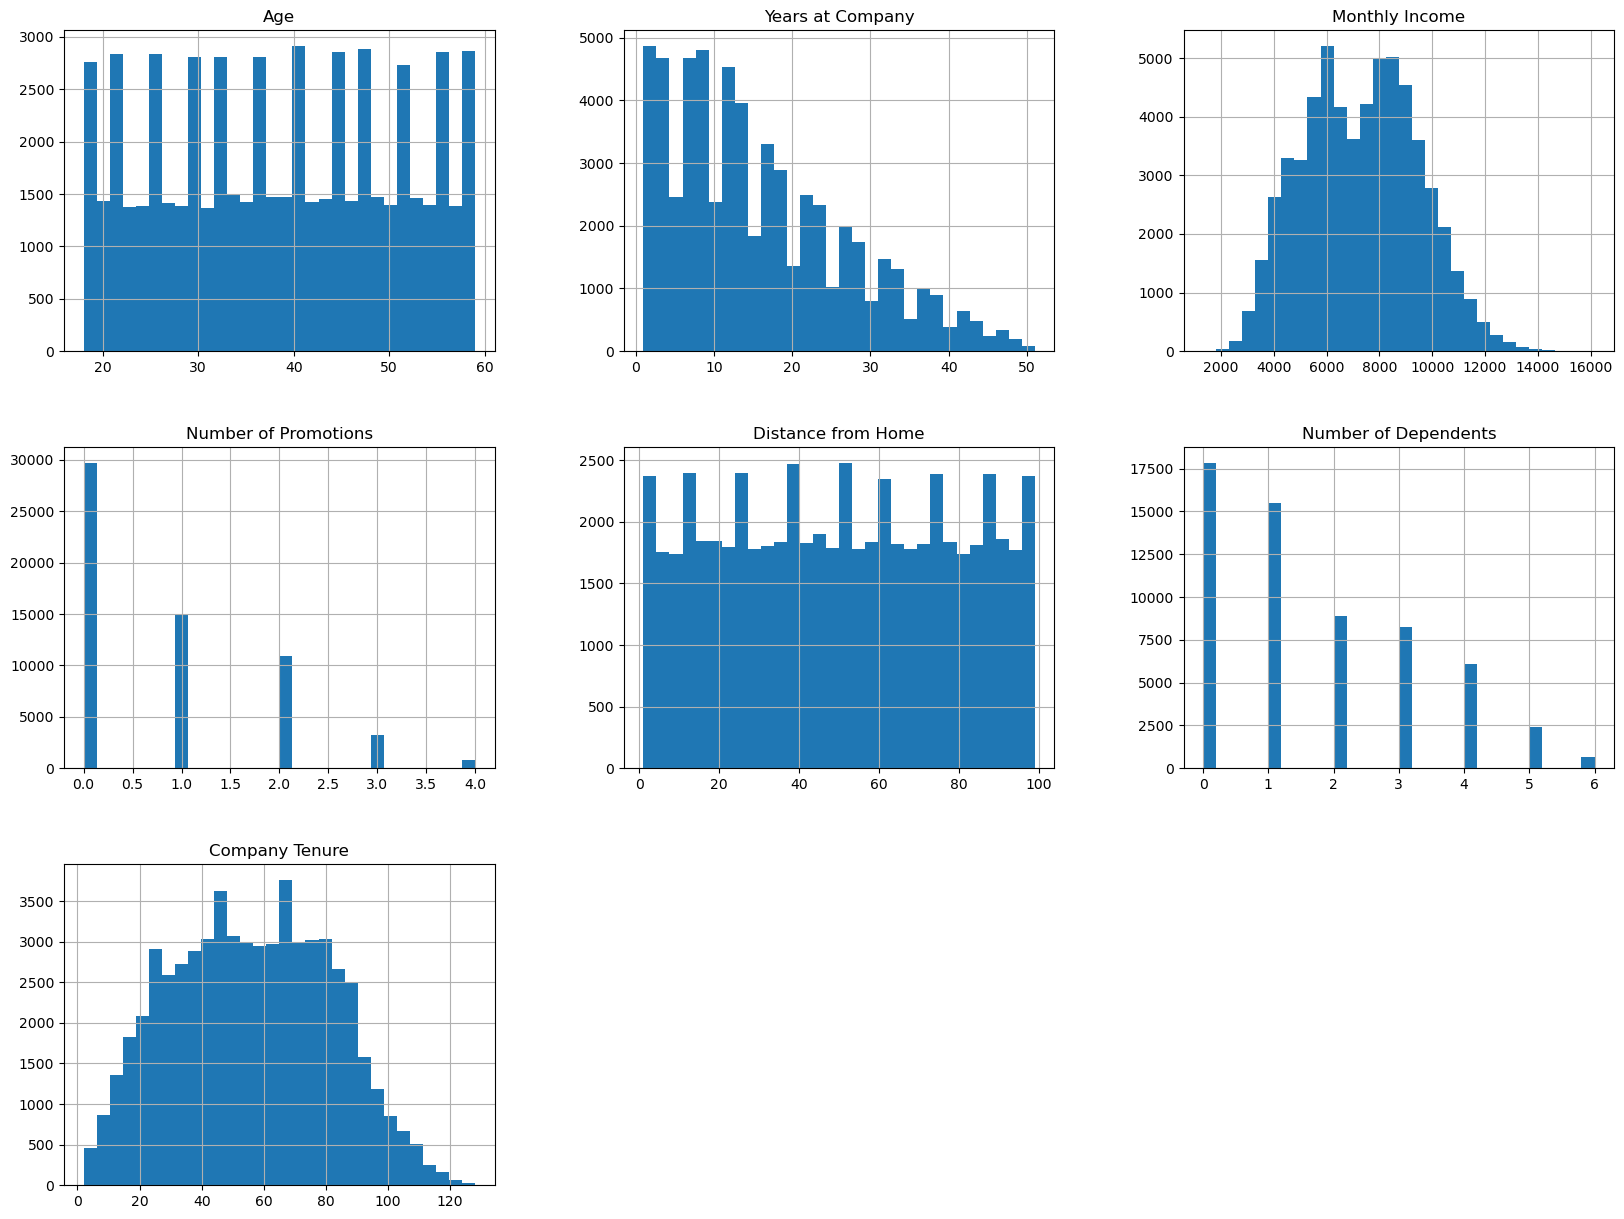

In [18]:
#To understand the distribution of numerical data
train_data_df.hist(bins=30, figsize=(20,15))

The histogram shows the distribution of numerical data in the dataset
- Years at the company - Right Skewed.
- Monthly Income - approximately normally distributed and it is bimodal.
- Company Tenure - approximately normally distributed and it is multimodal

### Boxplot

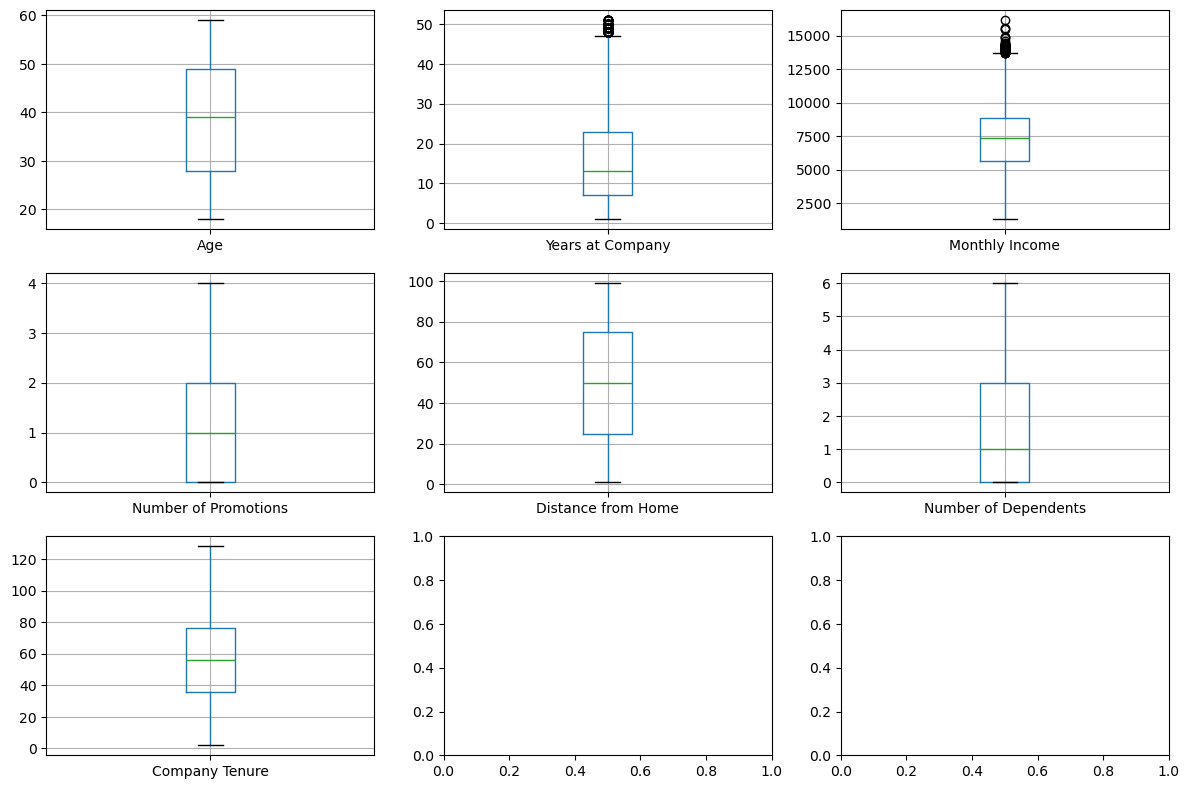

In [19]:
#To identify the outliers and understand the spread of the data

#create a grid of subplots
fig, ax = plt.subplots(3, 3, figsize=(12, 8))
#flatten the axes array
ax = ax.flatten()

#plot boxplot
for i, col in enumerate(numerical_cols):
    train_data_df.boxplot(col, ax = ax[i])

plt.tight_layout()
plt.show()

The boxplot is plotted for the numerical columns and it shows outliers in 'Years at company' and 'Monthly Income' above the upper whisker range

### Scatterplot

- Scatterplot to visualise the relationship between 'Years at Company' and 'Monthly Income' based on 'Number of Promotions'.
- Scatterplot to visualise the relationship between 'Age' and 'Monthly Income'.

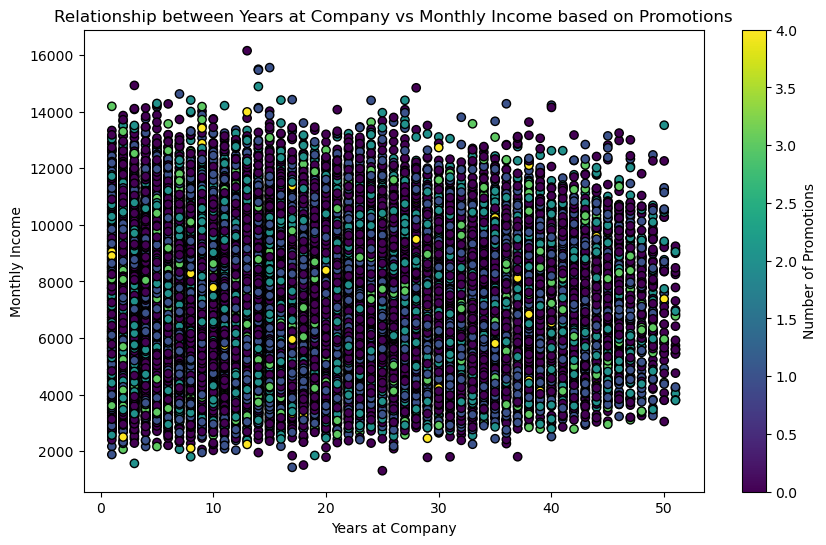

In [20]:
# Scatter Plot: Years at Company vs Monthly Income
plt.figure(figsize=(10, 6))
plt.scatter(train_data_df['Years at Company'], train_data_df['Monthly Income'], c=train_data_df['Number of Promotions'], cmap='viridis', edgecolor='k')
#plt.scatter(data_df['Years at Company'], data_df['Monthly Income'])
plt.colorbar(label='Number of Promotions')
plt.title('Relationship between Years at Company vs Monthly Income based on Promotions')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.show()

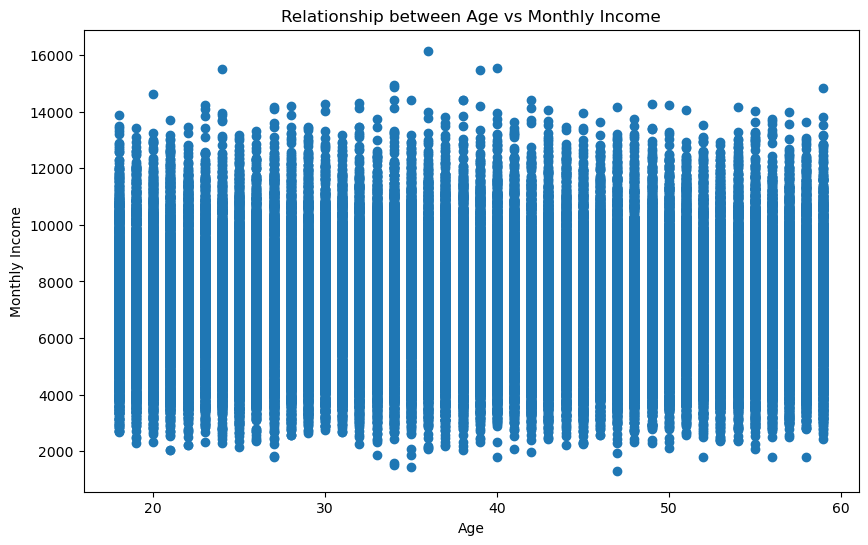

In [21]:
# Scatter Plot: Age vs Monthly Income
plt.figure(figsize=(10, 6))
plt.scatter(train_data_df['Age'], train_data_df['Monthly Income'])
plt.title('Relationship between Age vs Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

### Barcharts for Categorical Columns

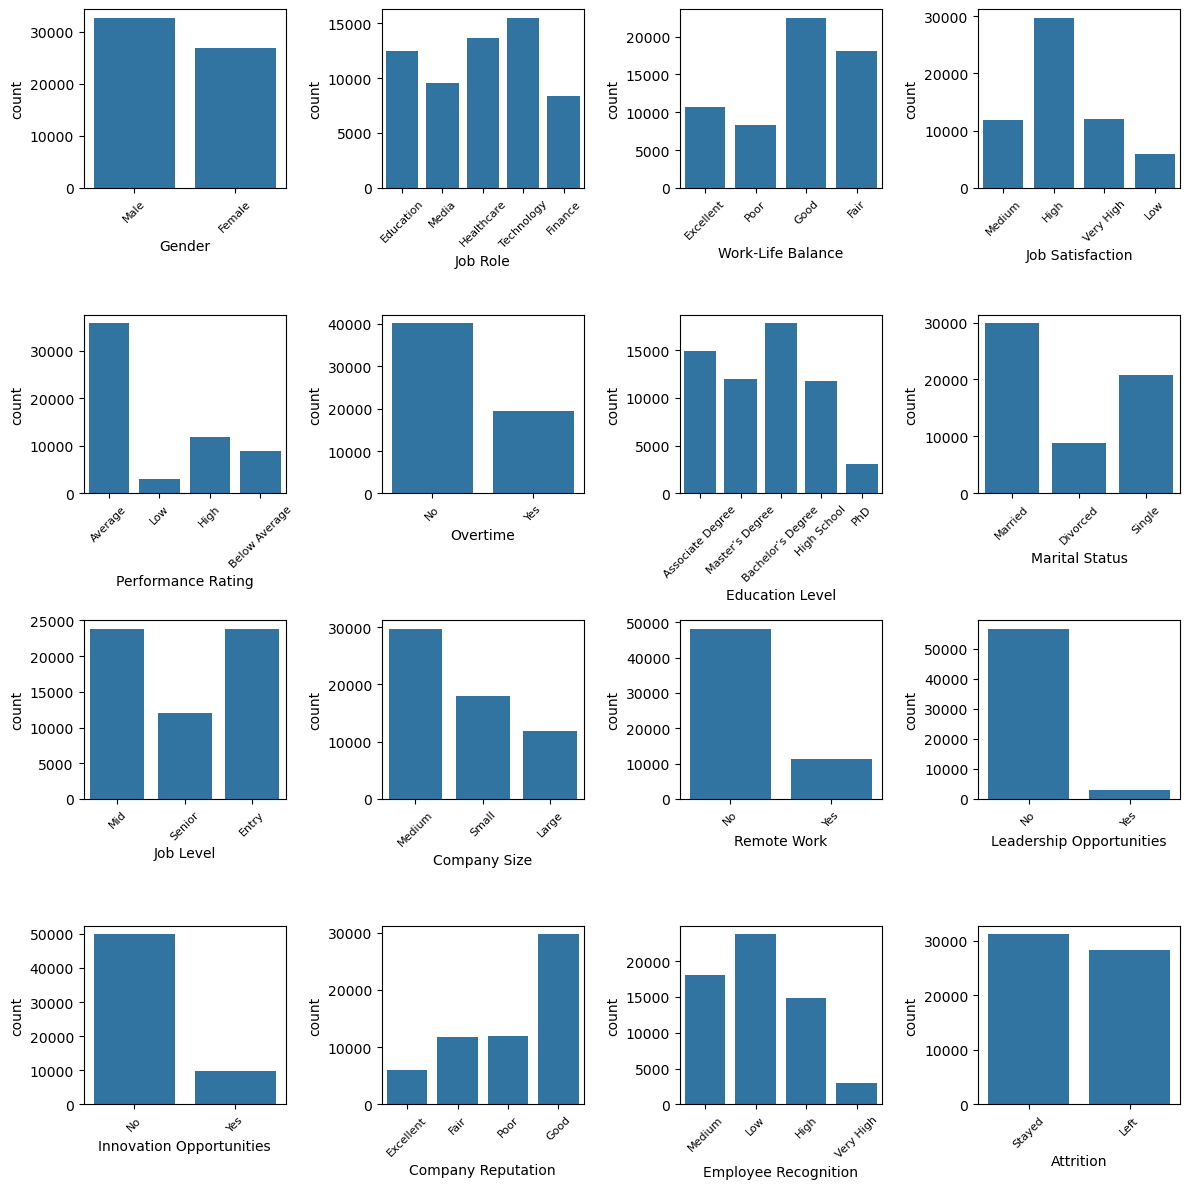

In [22]:
fig, ax = plt.subplots(4, 4, figsize=(12, 12))
ax = ax.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=train_data_df, ax=ax[i])
    plt.ylabel('count')
    ax[i].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

### 5.2 Test Data

### Histogram

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years at Company'}>,
        <Axes: title={'center': 'Monthly Income'}>],
       [<Axes: title={'center': 'Number of Promotions'}>,
        <Axes: title={'center': 'Distance from Home'}>,
        <Axes: title={'center': 'Number of Dependents'}>],
       [<Axes: title={'center': 'Company Tenure'}>, <Axes: >, <Axes: >]],
      dtype=object)

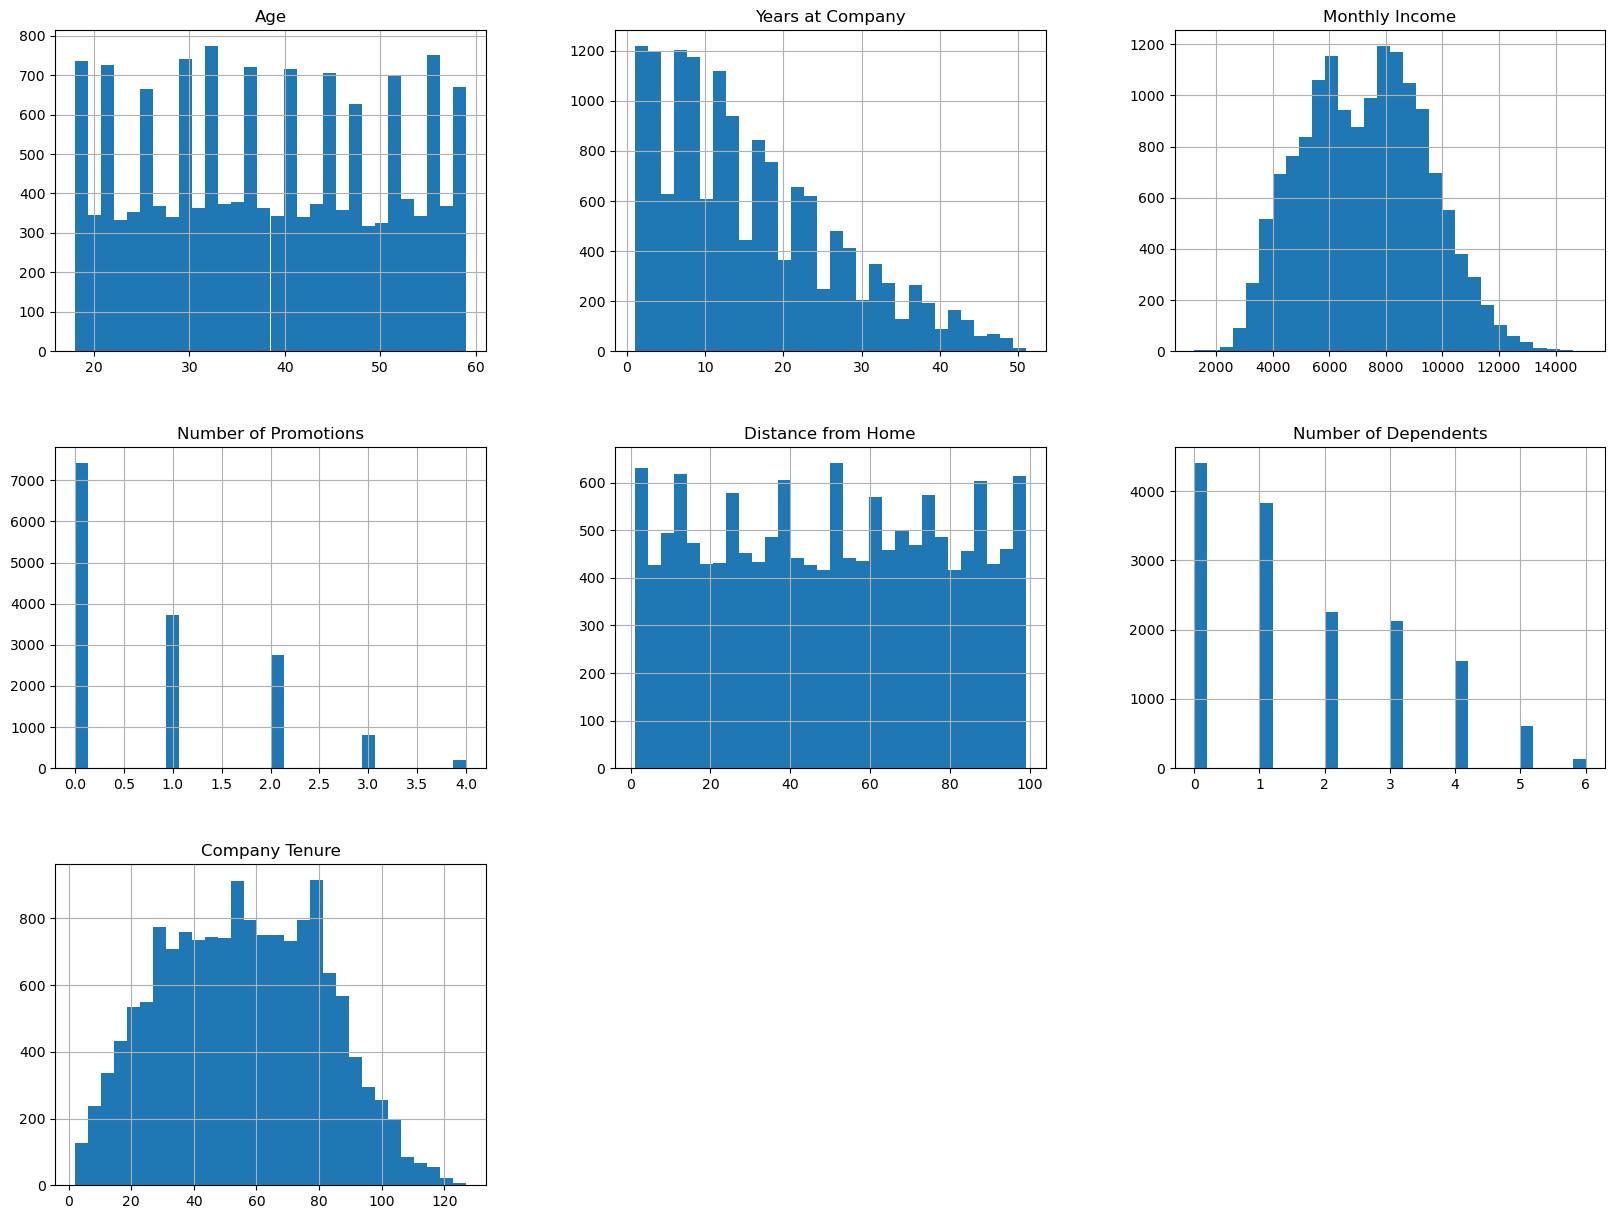

In [23]:
#To understand the distribution of numerical data
test_data_df.hist(bins=30, figsize=(20,15))

### Boxplot

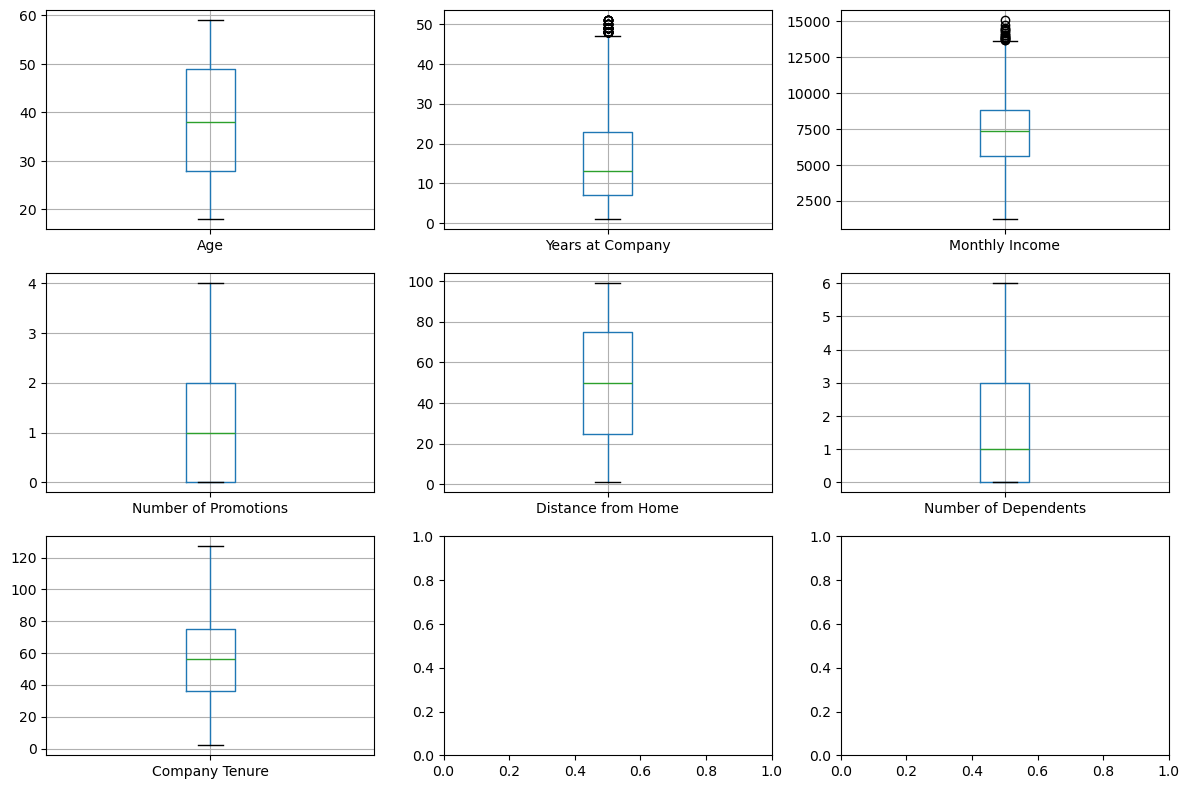

In [24]:
#To identify the outliers and understand the spread of the data

#create a grid of subplots
fig, ax = plt.subplots(3, 3, figsize=(12, 8))
#flatten the axes array
ax = ax.flatten()

#plot boxplot
for i, col in enumerate(numerical_cols):
    test_data_df.boxplot(col, ax = ax[i])

plt.tight_layout()
plt.show()

Similar to train data, test data also has outliers above the upper whisker of 'Years at Company' and 'Monthly Income'

### Scatterplot

- Scatterplot to visualise the relationship between 'Years at Company' and 'Monthly Income' based on 'Number of Promotions'.
- Scatterplot to visualise the relationship between 'Age' and 'Monthly Income'.

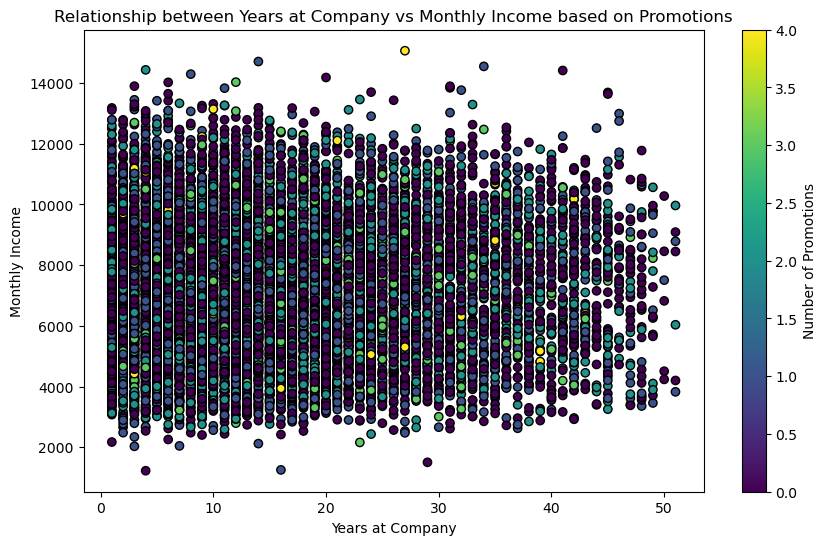

In [25]:
# Scatter Plot: Years at Company vs Monthly Income
plt.figure(figsize=(10, 6))
plt.scatter(test_data_df['Years at Company'], test_data_df['Monthly Income'], c=test_data_df['Number of Promotions'], cmap='viridis', edgecolor='k')
plt.colorbar(label='Number of Promotions')
plt.title('Relationship between Years at Company vs Monthly Income based on Promotions')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.show()

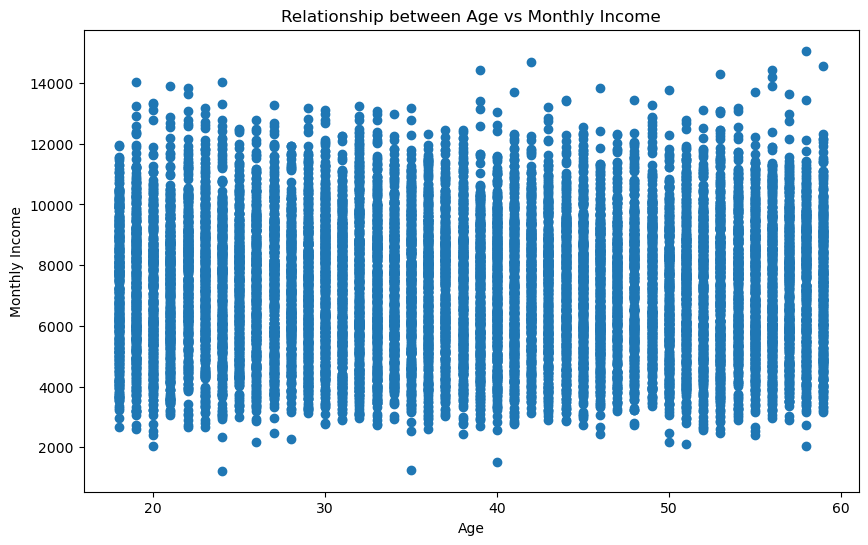

In [26]:
# Scatter Plot: Age vs Monthly Income
plt.figure(figsize=(10, 6))
plt.scatter(test_data_df['Age'], test_data_df['Monthly Income'])
plt.title('Relationship between Age vs Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

### Barcharts for Categorical Columns

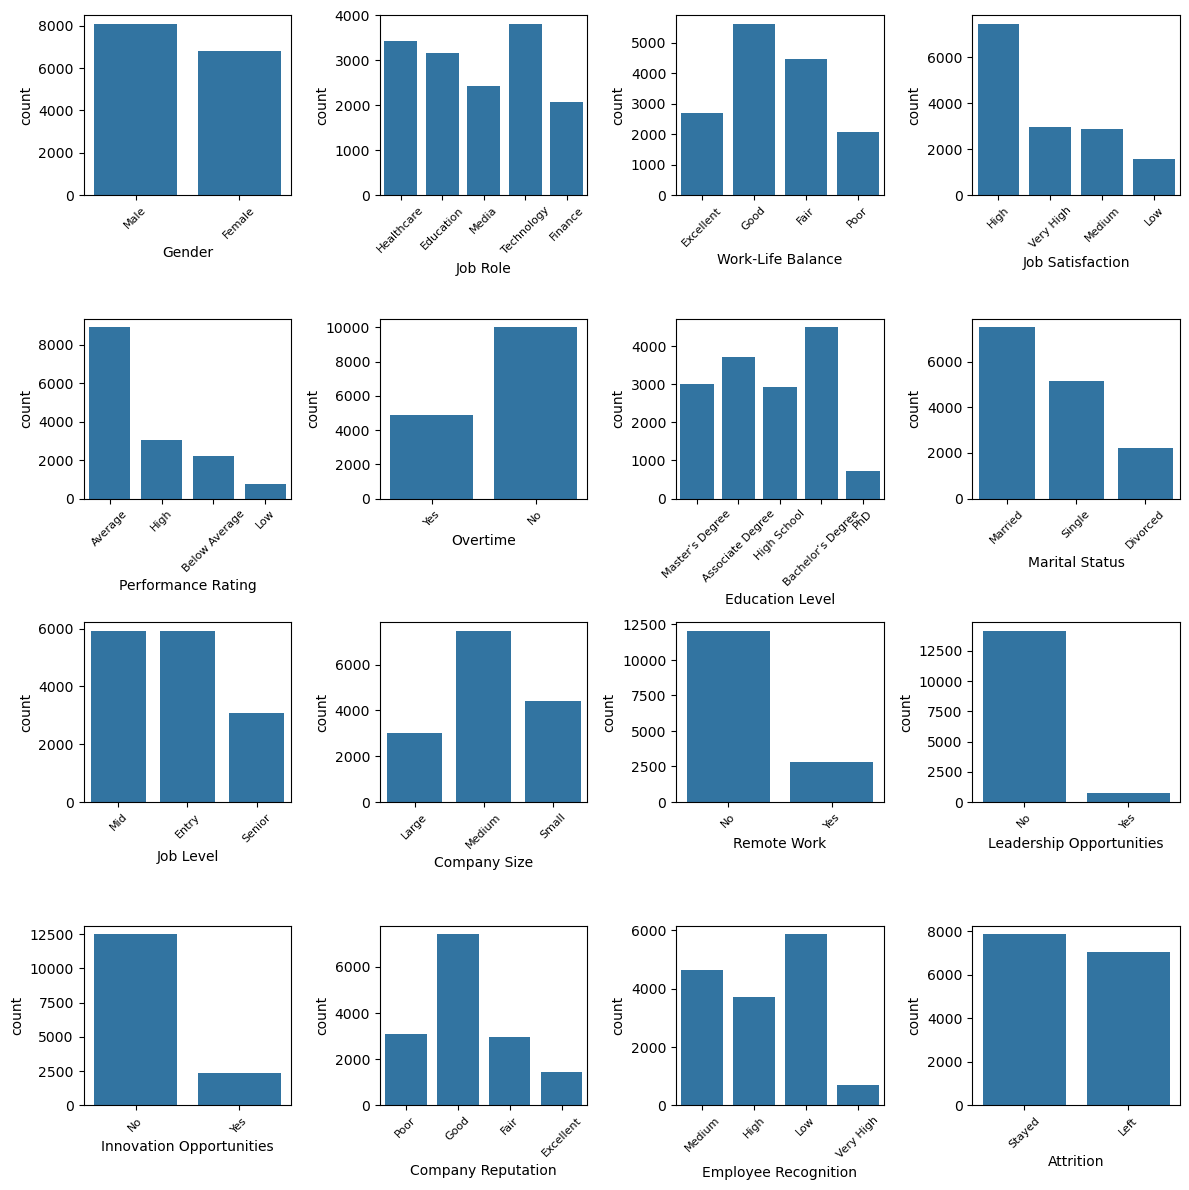

In [27]:
fig, ax = plt.subplots(4, 4, figsize=(12, 12))
ax = ax.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=test_data_df, ax=ax[i])
    plt.ylabel('count')
    ax[i].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

### 6. Feature Engineering

### 6.1 Train Data

### Categorical to Numerical using Encoding

### One-Hot & Label Encoding

In [28]:
train_data_df_encoded = train_data_df.copy()

#columns for one-hot encoding
one_hot_columns = ['Gender', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Attrition']

#One-hot encoding dictionary for the features in the columns
one_hot_encoding = {
    'No': 0, 'Yes': 1,
    'Stayed': 0, 'Left': 1,
    'Male': 0, 'Female': 1
}

#Apply One-Hot Encoding to specified categorical Columns
for col in one_hot_columns:
    if col in train_data_df_encoded.columns:
        train_data_df_encoded[col] = train_data_df_encoded[col].map(one_hot_encoding)

#columns for label encoding
label_encode_columns = ['Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 
                        'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Company Reputation', 
                        'Employee Recognition']

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in label_encode_columns:
    if col in train_data_df_encoded.columns:
        train_data_df_encoded[col] = label_encoder.fit_transform(train_data_df_encoded[col])

In [29]:
display(train_data_df_encoded.head())
print(train_data_df_encoded.shape)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,0,19,0,5390,0,2,0,2,0,...,0,1,1,89,0,0,0,0,2,0
1,59,1,4,3,5534,3,0,3,3,0,...,3,1,1,21,0,0,0,1,1,0
2,24,1,10,2,8159,2,0,3,0,0,...,3,1,1,74,0,0,0,3,1,0
3,36,1,7,0,3989,2,0,2,1,0,...,2,1,2,50,1,0,0,2,2,0
4,56,0,41,0,4821,1,3,0,0,1,...,0,2,1,68,0,0,0,1,2,0


(59598, 23)


### 6.2 Test Data

### Categorical to Numerical using Encoding

### One-Hot & Label Encoding

In [30]:
test_data_df_encoded = test_data_df.copy()

#columns for one-hot encoding
one_hot_columns = ['Gender', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Attrition']

#One-hot encoding dictionary for the features in the columns
one_hot_encoding = {
    'No': 0, 'Yes': 1,
    'Stayed': 0, 'Left': 1,
    'Male': 0, 'Female': 1
}

#Apply One-Hot Encoding to specified categorical Columns
for col in one_hot_columns:
    if col in test_data_df_encoded.columns:
        test_data_df_encoded[col] = test_data_df_encoded[col].map(one_hot_encoding)

#columns for label encoding
label_encode_columns = ['Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 
                        'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Company Reputation', 
                        'Employee Recognition']

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in label_encode_columns:
    if col in test_data_df_encoded.columns:
        test_data_df_encoded[col] = label_encoder.fit_transform(test_data_df_encoded[col])

In [31]:
display(test_data_df_encoded.head())
print(test_data_df_encoded.shape)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,36,0,13,2,8029,0,0,0,1,1,...,1,1,0,22,0,0,0,3,2,0
1,35,0,7,0,4563,2,0,0,1,1,...,4,0,1,27,0,0,0,2,0,1
2,50,0,7,0,5583,1,0,0,3,1,...,2,2,1,76,0,0,1,2,1,0
3,58,0,44,3,5525,1,3,2,0,1,...,4,0,1,96,0,0,0,3,1,1
4,39,0,24,0,4604,2,0,0,0,1,...,6,1,0,45,1,0,0,2,0,0


(14900, 23)


### 7. Feature Selection - Train Data

From the processed dataset, drop the features that are highly correlated with each other and having low correlation with the target variable

### Correlation - Heatmap Visualization

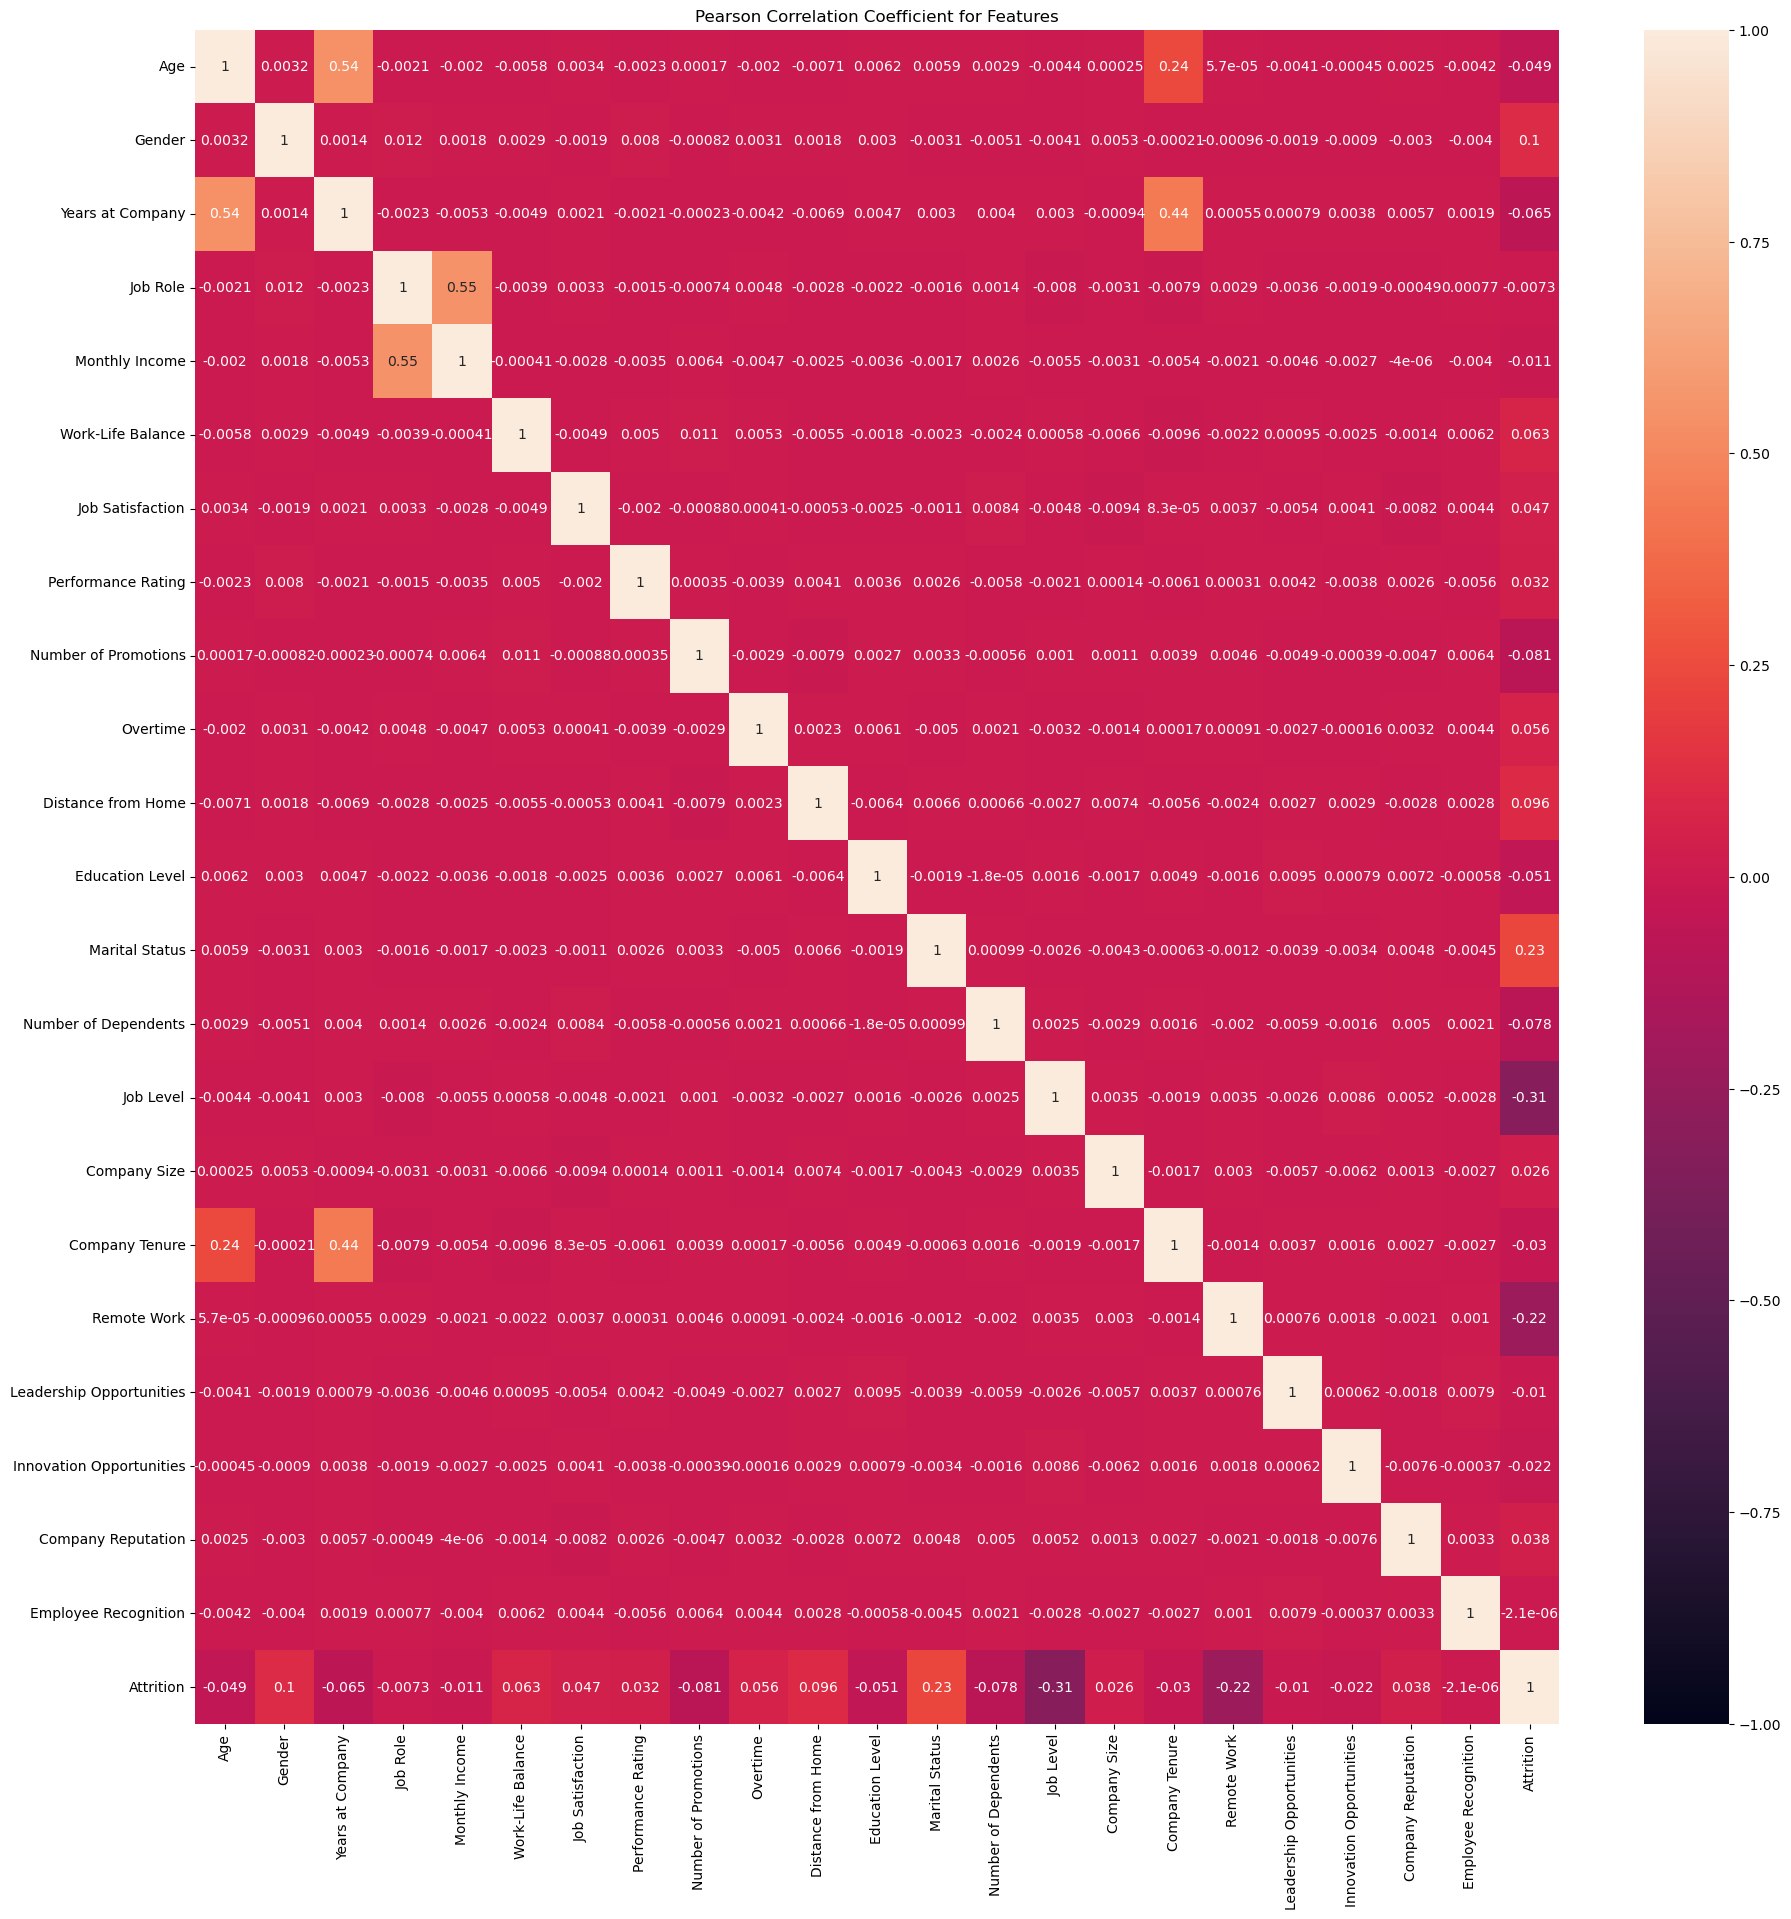

In [32]:
plt.figure(figsize=(22,22))
plt.title('Pearson Correlation Coefficient for Features', size=12)
sns.heatmap(train_data_df_encoded.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

### Feature Selection by Correlation

In [33]:
#Define the target varible
target_variable = 'Attrition'

#Calculate correlation matrix for training data
train_corr_matrix = train_data_df_encoded.corr().abs()
#display(train_corr_matrix)

#calculate correlation for each feature with target variable
target_corr_matrix = train_corr_matrix[target_variable].drop(target_variable)

#Define threshold
corr_threshold = 0.8

#Identify the features that are highly correlated
highly_corr_pairs = []

for i in range(train_corr_matrix.shape[0]):
    for j in range(i + 1, train_corr_matrix.shape[1]):
        if abs(train_corr_matrix.iloc[i, j]) > corr_threshold:
            highly_corr_pairs.append((train_corr_matrix.index[i], train_corr_matrix.columns[j], train_corr_matrix.iloc[i, j]))


#Filter pairs with low correlation to the target variable
low_threshold = 0.2
remaining_pairs = []

for pair in highly_corr_pairs:
    if abs(target_corr_matrix[pair[0]]) < low_threshold and abs(target_corr_matrix[pair[1]]) < low_threshold:
        remaining_pairs.append(pair)

print("Highly correlated feature pairs with low correlation to target variable:")
for pair in remaining_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

drop_features = set()

for pair in remaining_pairs:
    drop_features.add(pair[0])

train_data_df_encoded.drop(drop_features, axis=1, inplace=True)
print(f"Features dropped: {drop_features}")

print("Remaining features in training data:")
print(train_data_df_encoded.columns)

print(train_data_df_encoded.shape)

Highly correlated feature pairs with low correlation to target variable:
Features dropped: set()
Remaining features in training data:
Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')
(59598, 23)


None of the features are dropped.

### 8. Train and Test Dataset

In [71]:
#Separate features and target variable for training dataset
X_train = train_data_df_encoded.drop('Attrition', axis=1) #features
y_train = train_data_df_encoded['Attrition']  #target variable

#Separate features and target variable for test dataset
X_test = test_data_df_encoded.drop('Attrition', axis=1)  #features
y_test = test_data_df_encoded['Attrition']  #target variable

#Split training dataset into training and validation sets for hyperparameter tunning and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Print shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (47678, 22) (47678,)
Validation set shape: (11920, 22) (11920,)
Test set shape: (14900, 22) (14900,)


### 8. Checking for Outliers

### 8.1 Train Data

In [35]:
#Identify outliers using whisker's approach
def whisker_outlier(df):

    #Dataframe for outliers
    outliers = pd.DataFrame()

    #calculate outliers for numerical columns
    for column in df.select_dtypes(include=[np.number]).columns:
        #Quartile 1
        Q1 = df[column].quantile(0.25)
        #Quartile 3
        Q3 = df[column].quantile(0.75)
        #Interquartile range
        IQR = Q3 - Q1
        #lower whisker bound
        lower_bound = Q1 - 1.5 * IQR
        #upper whisker bound
        upper_bound = Q3 + 1.5 * IQR
        #define outliers based on lower and upper bound
        outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound))
       
    return outliers
    
#Find outliers using IQR method
outliers = whisker_outlier(X_train)

#percentage of outliers
percentage_outliers = (outliers.sum() / len(X_train)) * 100
print(percentage_outliers)

Age                          0.000000
Gender                       0.000000
Years at Company             0.440455
Job Role                     0.000000
Monthly Income               0.090188
Work-Life Balance            0.000000
Job Satisfaction             0.000000
Performance Rating           4.933093
Number of Promotions         0.000000
Overtime                     0.000000
Distance from Home           0.000000
Education Level              0.000000
Marital Status               0.000000
Number of Dependents         0.000000
Job Level                    0.000000
Company Size                 0.000000
Company Tenure               0.000000
Remote Work                 18.912287
Leadership Opportunities     4.912119
Innovation Opportunities    16.280045
Company Reputation           0.000000
Employee Recognition         0.000000
dtype: float64


### 8.2 Test Data

In [36]:
#Identify outliers using whisker's approach
def whisker_outlier(df):

    #Dataframe for outliers
    outliers = pd.DataFrame()

    #calculate outliers for numerical columns
    for column in df.select_dtypes(include=[np.number]).columns:
        #Quartile 1
        Q1 = df[column].quantile(0.25)
        #Quartile 3
        Q3 = df[column].quantile(0.75)
        #Interquartile range
        IQR = Q3 - Q1
        #lower whisker bound
        lower_bound = Q1 - 1.5 * IQR
        #upper whisker bound
        upper_bound = Q3 + 1.5 * IQR
        #define outliers based on lower and upper bound
        outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound))
       
    return outliers
    
#Find outliers using IQR method
outliers = whisker_outlier(X_test)

#percentage of outliers
percentage_outliers = (outliers.sum() / len(X_test)) * 100
print(percentage_outliers)

Age                          0.000000
Gender                       0.000000
Years at Company             0.436242
Job Role                     0.000000
Monthly Income               0.107383
Work-Life Balance            0.000000
Job Satisfaction             0.000000
Performance Rating           0.000000
Number of Promotions         0.000000
Overtime                     0.000000
Distance from Home           0.000000
Education Level              0.000000
Marital Status               0.000000
Number of Dependents         0.000000
Job Level                    0.000000
Company Size                 0.000000
Company Tenure               0.000000
Remote Work                 19.053691
Leadership Opportunities     4.932886
Innovation Opportunities    16.114094
Company Reputation           0.000000
Employee Recognition         0.000000
dtype: float64


The outliers can be well handled by advanced classification models

### 9. Feature Scaling

### Train Data Before Feature Scaling

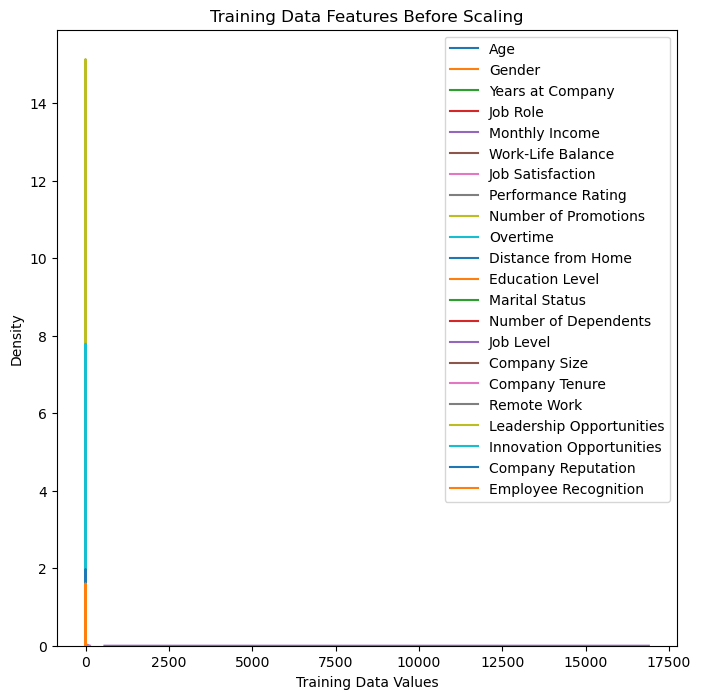

In [37]:
plt.figure(figsize=(8, 8))
plt.title('Training Data Features Before Scaling')
plt.xlabel('Training Data Values')
for col in X_train.columns:
    sns.kdeplot(X_train[col], label=col)
plt.legend()
plt.show()

### Using Standard Scalar

In [38]:
scaler_model = StandardScaler()

for col in X_train.columns:
    X_train[col] = scaler_model.fit_transform(X_train[[col]])
    X_test[col] = scaler_model.transform(X_test[[col]])

### Training Data After Feature Scaling

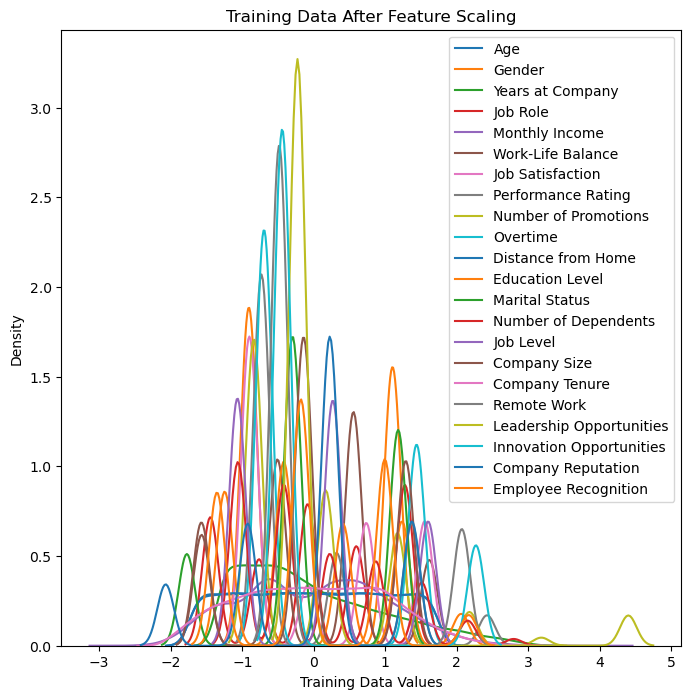

In [39]:
plt.figure(figsize=(8, 8))
plt.title('Training Data After Feature Scaling')
plt.xlabel('Training Data Values')
for col in X_train.columns:
    sns.kdeplot(X_train[col], label=col)
plt.legend()
plt.show()

## MODEL BUILDING

### 10. Logistic Regression

In [70]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

y_pred_logistic = logistic_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("ROC AUC Score:", roc_auc_score(y_test, logistic_reg.predict_proba(X_test)[:, 1]))

Logistic Regression Accuracy: 0.7173154362416108
ROC AUC Score: 0.7938840700916661


### 11. Random Forest Classifier

### 11.1 Random Forest Classifier with Default Parameters

In [59]:
#Define the model
random_clf = RandomForestClassifier(random_state=69)

#Train the model
random_clf.fit(X_train, y_train)

#Predict the model
y_pred_randforest = random_clf.predict(X_test)

print("Accuracy using Random Forest Classifier- Default Parameters:", accuracy_score(y_test, y_pred_randforest))
print("ROC AUC Score - Default Parameters:", roc_auc_score(y_test, random_clf.predict_proba(X_test)[:, 1]))

Accuracy using Random Forest Classifier- Default Parameters: 0.7474496644295302
ROC AUC Score - Default Parameters: 0.8336591552134683


### 11.2 Random Forest Classifier with Manual Parameters

In [60]:
#Define the model with manual parameters
random_clf_param = RandomForestClassifier(n_estimators = 500, criterion='entropy', max_features='sqrt',min_samples_leaf=10, random_state = 69)

#Train the model
random_clf_param.fit(X_train, y_train)

#Predict the model
y_pred_randforest_param = random_clf_param.predict(X_test)

print("Accuracy using Random Forest Classifier - Manual Parameters:", accuracy_score(y_test, y_pred_randforest_param))
print("ROC AUC Score - Manual Parameters:", roc_auc_score(y_test, random_clf_param.predict_proba(X_test)[:, 1]))

Accuracy using Random Forest Classifier - Manual Parameters: 0.7514093959731544
ROC AUC Score - Manual Parameters: 0.8402054512366448


### 12. XGBoost 

### 12.1 Hyperparameter Tuning and Cross Validation using GridSearchCV

In [42]:
#Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

#Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

#Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

#Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

#Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}
Best score:  0.7582113297705732


### 12.2 Prediction on Test Data

In [45]:
#choose the best estimator by grid search cv
best_estimator = grid_search.best_estimator_

#prediction on train data
y_train_pred_xgb = best_estimator.predict(X_train)
y_train_pred_proba_xgb = best_estimator.predict_proba(X_train)[:, 1]

#prediction on test dat
y_test_pred_xgb = best_estimator.predict(X_test)
y_test_pred_proba_xgb = best_estimator.predict_proba(X_test)[:, 1]

### 12.3 Evaluating Model Performance on Training Data

In [64]:
# Confusion matrix
train_confusion_matrix = confusion_matrix(y_train, y_train_pred_xgb)

#Classification Report
train_classify_report = classification_report(y_train, y_train_pred_xgb)

#rou_auc score
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba_xgb)

print('Training Data Performance')
print("Confusion Matrix:\n", train_confusion_matrix)
print("\nClassification Report:\n", train_classify_report)
print("ROC AUC: ", train_roc_auc)

Training Data Performance
Confusion Matrix:
 [[19558  5449]
 [ 5380 17291]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78     25007
           1       0.76      0.76      0.76     22671

    accuracy                           0.77     47678
   macro avg       0.77      0.77      0.77     47678
weighted avg       0.77      0.77      0.77     47678

ROC AUC:  0.8669590978643134


### 12.4 Evaluating Model Performance on Test Data

In [68]:
# Confusion matrix
test_confusion_matrix = confusion_matrix(y_test, y_test_pred_xgb)

#Classification Report
test_classify_report = classification_report(y_test, y_test_pred_xgb)

#rou_auc score
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba_xgb)

print('Test Data Performance\n')
print("Confusion Matrix:\n", test_confusion_matrix)
print("\nClassification Report:\n", test_classify_report)
print("ROC AUC: ", test_roc_auc)

Test Data Performance

Confusion Matrix:
 [[6068 1800]
 [1774 5258]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      7868
           1       0.74      0.75      0.75      7032

    accuracy                           0.76     14900
   macro avg       0.76      0.76      0.76     14900
weighted avg       0.76      0.76      0.76     14900

ROC AUC:  0.8507967047148255


### 13. Feature Importance

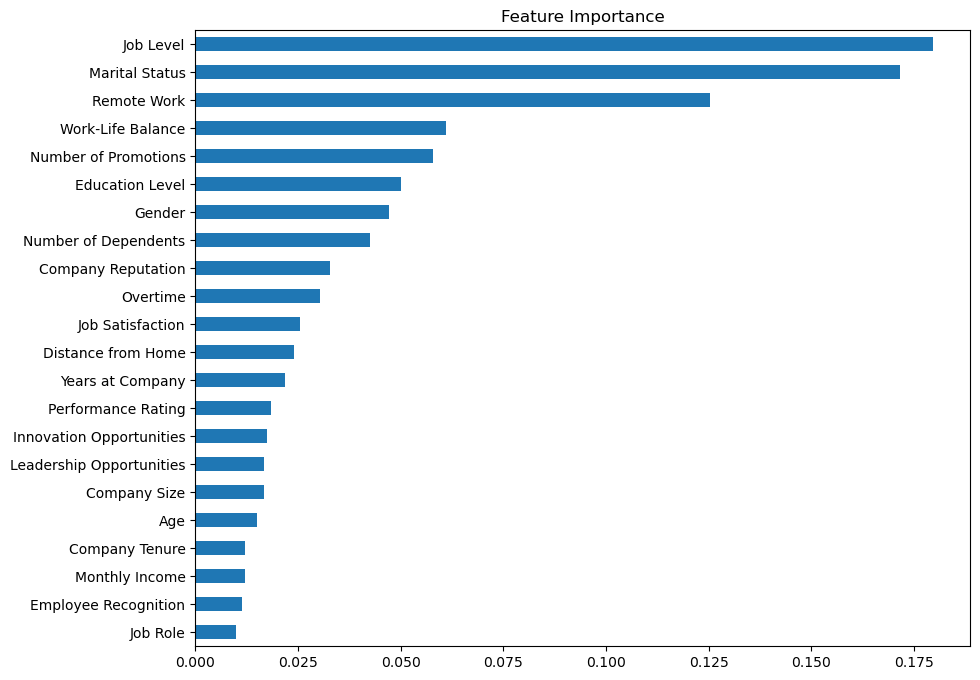

In [66]:
#Finding feature importance
plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
important_feature = pd.Series(best_estimator.feature_importances_,index = X_train.columns)
important_feature.nlargest(50).sort_values().plot(kind = 'barh', align = 'center')
plt.show()